In [1]:
!pip install imbalanced-learn

In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 3.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

In [3]:
target = 'Heart Attack Risk'

In [4]:
train = train.drop(columns=['Hemisphere', 'Continent'])
val = val.drop(columns=['Hemisphere', 'Continent'])
test = test.drop(columns=['Hemisphere', 'Continent'])

# CatBoost

In [2]:
import catboost
from catboost import CatBoostClassifier
import optuna 
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
text_columns = train.select_dtypes(include='object').columns.tolist()

In [89]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6849040	test: 0.6852377	best: 0.6852377 (0)	total: 5.67ms	remaining: 5.67s
100:	learn: 0.6363599	test: 0.6556740	best: 0.6526978 (21)	total: 241ms	remaining: 2.14s
200:	learn: 0.6147163	test: 0.6584613	best: 0.6526978 (21)	total: 476ms	remaining: 1.89s
300:	learn: 0.5969817	test: 0.6605025	best: 0.6526978 (21)	total: 711ms	remaining: 1.65s
400:	learn: 0.5793773	test: 0.6611340	best: 0.6526978 (21)	total: 947ms	remaining: 1.41s
500:	learn: 0.5641370	test: 0.6626822	best: 0.6526978 (21)	total: 1.18s	remaining: 1.18s
600:	learn: 0.5506414	test: 0.6661355	best: 0.6526978 (21)	total: 1.42s	remaining: 945ms
700:	learn: 0.5367256	test: 0.6686701	best: 0.6526978 (21)	total: 1.66s	remaining: 707ms
800:	learn: 0.5243894	test: 0.6711518	best: 0.6526978 (21)	total: 1.9s	remaining: 471ms
900:	learn: 0.5132946	test: 0.6740741	best: 0.6526978 (21)	total: 2.13s	remaining: 235ms
999:	learn: 0.5034783	test: 0.6770015	best: 0.6526978 (21)	total: 2.38s	remaining: 0us

bestTest = 0.6526977668
b

In [90]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.5629400705970274
VAL : 0.5020382165605095
TEST : 0.4925987261146497


In [91]:
print(f"TRAIN : {f1_score(train[target], model.predict(train.drop(columns=target)))}")
print(f"VAL : {f1_score(val[target], model.predict(val.drop(columns=target)))}")
print(f"TEST : {f1_score(test[target], model.predict(test.drop(columns=target)))}")

TRAIN : 0.0
VAL : 0.0
TEST : 0.0


In [92]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [65]:
res = permutation_importance(model, train.drop(columns=target), train[target], n_repeats=10, random_state=42)

In [68]:
new_features = [list(train.drop(columns=target).columns)[i] for i in res['importances_mean'].argsort()[::1] if res['importances_mean'][i] - 1*res['importances_std'][i] > 0]



In [69]:
new_features

[]

In [71]:
df = pd.read_csv('./heart_attack_prediction_dataset.csv')

In [72]:
df = df.drop(columns='Patient ID')

In [83]:
#df = df.drop(columns=text_columns)
df = df.drop(columns=['Continent', 'Hemisphere'])

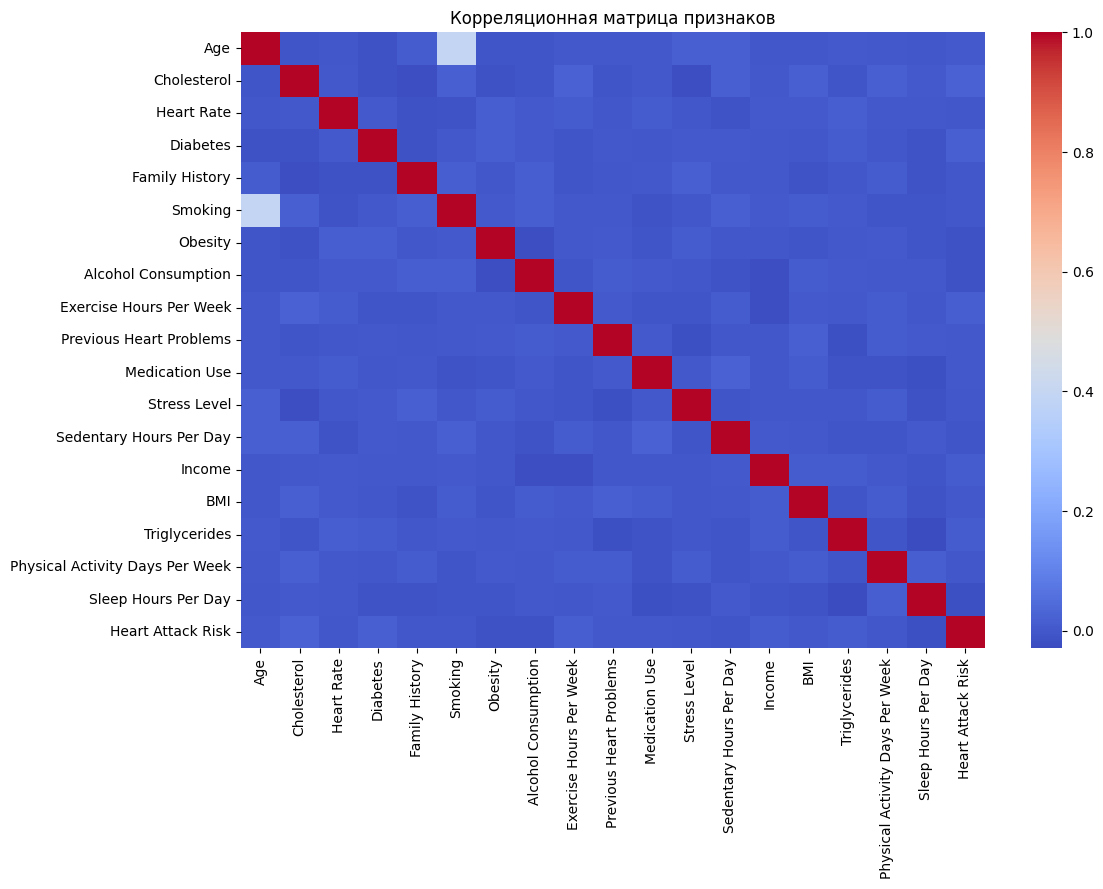

In [84]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Корреляционная матрица признаков")
plt.show()

In [93]:
train[target].value_counts()

Heart Attack Risk
0    3374
1    1883
Name: count, dtype: int64

In [94]:
val[target].value_counts()

Heart Attack Risk
0    1125
1     628
Name: count, dtype: int64

In [95]:
test[target].value_counts()

Heart Attack Risk
0    1125
1     628
Name: count, dtype: int64

In [96]:
res

{'importances_mean': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'importances_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 'importances': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0

## Second catboost

In [9]:
train = train.drop(columns='Country')
val = val.drop(columns='Country')
test = test.drop(columns='Country')

In [10]:
train

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
5959,20,Male,302,131/107,79,1,1,1,0,0,...,1,1,8,9.270563,233116,30.582096,560,1,4,0
1884,75,Female,129,101/63,61,0,0,1,0,1,...,0,0,5,4.910913,282458,21.309652,787,5,9,0
3995,66,Male,201,172/91,59,1,0,1,0,0,...,1,0,4,7.882558,173413,39.936744,580,5,8,0
4045,63,Male,341,124/70,74,1,1,1,1,0,...,1,0,7,11.691194,62097,31.793333,590,3,5,1
2512,57,Male,242,110/81,105,1,0,1,0,1,...,1,0,4,1.459926,186510,38.382956,332,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,55,Male,394,96/62,75,0,1,1,0,1,...,0,1,2,6.891463,98099,32.003506,752,2,6,0
885,56,Male,134,100/60,100,1,0,1,1,1,...,1,0,6,7.238427,119182,38.608541,71,5,9,0
8289,44,Male,174,145/105,66,1,1,1,0,0,...,0,0,10,11.547078,205271,24.808414,123,3,7,0
704,19,Female,366,159/63,45,0,0,0,0,1,...,0,0,3,3.756734,139056,35.791862,386,0,5,0


In [11]:
df = pd.read_csv('./heart_attack_prediction_dataset.csv')

In [12]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [13]:
df = df.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [15]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

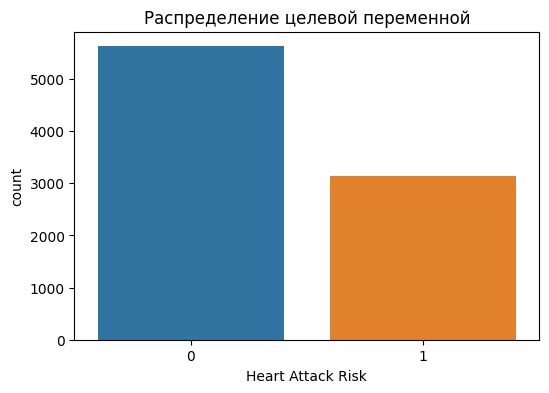

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Attack Risk', data=df)
plt.title('Распределение целевой переменной')
plt.show()


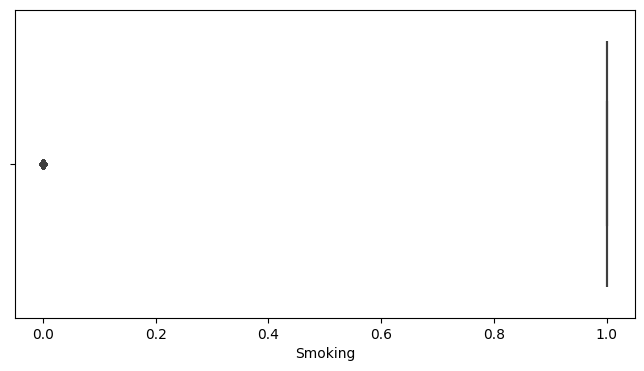

In [58]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Smoking'])
plt.show()


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 5959 to 2024
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5257 non-null   int64  
 1   Sex                              5257 non-null   object 
 2   Cholesterol                      5257 non-null   int64  
 3   Blood Pressure                   5257 non-null   object 
 4   Heart Rate                       5257 non-null   int64  
 5   Diabetes                         5257 non-null   int64  
 6   Family History                   5257 non-null   int64  
 7   Smoking                          5257 non-null   int64  
 8   Obesity                          5257 non-null   int64  
 9   Alcohol Consumption              5257 non-null   int64  
 10  Exercise Hours Per Week          5257 non-null   float64
 11  Diet                             5257 non-null   object 
 12  Previous Heart Problem

In [64]:
train = train.drop(columns=['Smoking'])
val = val.drop(columns=['Smoking'])
test = test.drop(columns=['Smoking'])

In [65]:
text_columns = train.select_dtypes(include='object').columns.tolist()

In [66]:
text_columns

['Sex', 'Blood Pressure', 'Diet']

In [67]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6850263	test: 0.6852190	best: 0.6852190 (0)	total: 65.9ms	remaining: 1m 5s
100:	learn: 0.6337207	test: 0.6537897	best: 0.6521717 (49)	total: 278ms	remaining: 2.48s
200:	learn: 0.6090972	test: 0.6593441	best: 0.6521717 (49)	total: 486ms	remaining: 1.93s
300:	learn: 0.5909761	test: 0.6609786	best: 0.6521717 (49)	total: 705ms	remaining: 1.64s
400:	learn: 0.5755965	test: 0.6648101	best: 0.6521717 (49)	total: 932ms	remaining: 1.39s
500:	learn: 0.5590868	test: 0.6678041	best: 0.6521717 (49)	total: 1.16s	remaining: 1.16s
600:	learn: 0.5440603	test: 0.6701985	best: 0.6521717 (49)	total: 1.38s	remaining: 916ms
700:	learn: 0.5299748	test: 0.6720831	best: 0.6521717 (49)	total: 1.6s	remaining: 685ms
800:	learn: 0.5175347	test: 0.6749979	best: 0.6521717 (49)	total: 1.83s	remaining: 454ms
900:	learn: 0.5055769	test: 0.6744923	best: 0.6521717 (49)	total: 2.06s	remaining: 226ms
999:	learn: 0.4946779	test: 0.6764884	best: 0.6521717 (49)	total: 2.28s	remaining: 0us

bestTest = 0.6521716946
b

In [68]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.6059596029869474
VAL : 0.5132611464968153
TEST : 0.5282307147912244


In [69]:
train = train.drop(columns=['Blood Pressure'])
val = val.drop(columns=['Blood Pressure'])
test = test.drop(columns=['Blood Pressure'])

In [72]:
text_columns = train.select_dtypes(include='object').columns.tolist()

In [81]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train.drop(columns=target), train[target], eval_set = (val.drop(columns=target), val[target]), verbose=100)

0:	learn: 0.6851603	test: 0.6853714	best: 0.6853714 (0)	total: 3.15ms	remaining: 3.14s
100:	learn: 0.6329865	test: 0.6546433	best: 0.6533897 (20)	total: 204ms	remaining: 1.82s
200:	learn: 0.6086518	test: 0.6582209	best: 0.6533897 (20)	total: 394ms	remaining: 1.57s
300:	learn: 0.5869975	test: 0.6608341	best: 0.6533897 (20)	total: 594ms	remaining: 1.38s
400:	learn: 0.5696283	test: 0.6618595	best: 0.6533897 (20)	total: 795ms	remaining: 1.19s
500:	learn: 0.5529516	test: 0.6660376	best: 0.6533897 (20)	total: 991ms	remaining: 987ms
600:	learn: 0.5387537	test: 0.6673833	best: 0.6533897 (20)	total: 1.18s	remaining: 783ms
700:	learn: 0.5243345	test: 0.6707435	best: 0.6533897 (20)	total: 1.39s	remaining: 591ms
800:	learn: 0.5112313	test: 0.6715657	best: 0.6533897 (20)	total: 1.59s	remaining: 396ms
900:	learn: 0.4986545	test: 0.6742985	best: 0.6533897 (20)	total: 1.8s	remaining: 198ms
999:	learn: 0.4873125	test: 0.6768816	best: 0.6533897 (20)	total: 2s	remaining: 0us

bestTest = 0.6533896992
best

In [82]:
print(f"TRAIN : {roc_auc_score(train[target], model.predict_proba(train.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target], model.predict_proba(val.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target], model.predict_proba(test.drop(columns=target))[:, 1])}")

TRAIN : 0.5827929268238168
VAL : 0.4892823779193206
TEST : 0.5116022646850673


In [83]:
print(classification_report(test[target], model.predict(test.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Third catboost

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE(random_state=42)

In [86]:
y_train = train[target]
x_train = train.drop(columns=[target])
y_val = val[target]
x_val = val.drop(columns=[target])
y_test = test[target]
x_test = test.drop(columns=[target])

In [96]:
#x_train = pd.get_dummies(x_train, columns=['Sex', 'Diet'], drop_first=True)
x_val = pd.get_dummies(x_val, columns=['Sex', 'Diet'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Sex', 'Diet'], drop_first=True)


In [99]:
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)
x_val_new, y_val_new = smote.fit_resample(x_val, y_val)
x_test_new, y_test_new = smote.fit_resample(x_test, y_test)

In [108]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(x_train_new, y_train_new, eval_set = (x_val, y_val), verbose=100)

0:	learn: 0.6884098	test: 0.6914031	best: 0.6914031 (0)	total: 2.45ms	remaining: 2.45s
100:	learn: 0.5980014	test: 0.6830860	best: 0.6792506 (30)	total: 132ms	remaining: 1.18s
200:	learn: 0.5675975	test: 0.6919802	best: 0.6792506 (30)	total: 260ms	remaining: 1.03s
300:	learn: 0.5441116	test: 0.6956486	best: 0.6792506 (30)	total: 375ms	remaining: 872ms
400:	learn: 0.5255031	test: 0.6973649	best: 0.6792506 (30)	total: 492ms	remaining: 735ms
500:	learn: 0.5092111	test: 0.7033257	best: 0.6792506 (30)	total: 608ms	remaining: 606ms
600:	learn: 0.4940296	test: 0.7056451	best: 0.6792506 (30)	total: 733ms	remaining: 486ms
700:	learn: 0.4805142	test: 0.7093932	best: 0.6792506 (30)	total: 859ms	remaining: 366ms
800:	learn: 0.4674907	test: 0.7116300	best: 0.6792506 (30)	total: 980ms	remaining: 243ms
900:	learn: 0.4551953	test: 0.7141107	best: 0.6792506 (30)	total: 1.1s	remaining: 121ms
999:	learn: 0.4441234	test: 0.7167474	best: 0.6792506 (30)	total: 1.22s	remaining: 0us

bestTest = 0.679250609
be

In [107]:
print(f"TRAIN : {roc_auc_score(y_train_new, model.predict_proba(x_train_new)[:, 1])}")
print(f"VAL : {roc_auc_score(y_val_new, model.predict_proba(x_val_new)[:, 1])}")
print(f"TEST : {roc_auc_score(y_test_new, model.predict_proba(x_test_new)[:, 1])}")

TRAIN : 0.7939011282273278
VAL : 0.6993200987654321
TEST : 0.6766885925925926


In [109]:
print(f"TRAIN : {roc_auc_score(y_train_new, model.predict_proba(x_train_new)[:, 1])}")
print(f"VAL : {roc_auc_score(y_val, model.predict_proba(x_val)[:, 1])}")
print(f"TEST : {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}")

TRAIN : 0.708774190794067
VAL : 0.5145378627034678
TEST : 0.4848365180467091


## Less zeros catboost

In [4]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [6]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [10]:
zeros_sample = df[df[target] == 0].sample(n=3139, random_state=42)

ones_sample = df[df[target] == 1]

balanced_df = pd.concat([zeros_sample, ones_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df[target].value_counts())

Heart Attack Risk
1    3139
0    3139
Name: count, dtype: int64


In [11]:
target = 'Heart Attack Risk'

In [14]:
train_new, test_new = train_test_split(df, test_size=0.2, random_state=0)

In [15]:
train_new, val_new = train_test_split(train_new, test_size=0.25, random_state=0)

In [16]:
text_columns = train_new.select_dtypes(include='object').columns.tolist()

In [17]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train_new.drop(columns=target), train_new[target], eval_set = (val_new.drop(columns=target), val_new[target]), verbose=100)

0:	learn: 0.6854004	test: 0.6848128	best: 0.6848128 (0)	total: 63.8ms	remaining: 1m 3s
100:	learn: 0.6395866	test: 0.6478011	best: 0.6469584 (32)	total: 314ms	remaining: 2.79s
200:	learn: 0.6173913	test: 0.6498979	best: 0.6469584 (32)	total: 564ms	remaining: 2.24s
300:	learn: 0.5978583	test: 0.6531417	best: 0.6469584 (32)	total: 821ms	remaining: 1.91s
400:	learn: 0.5828934	test: 0.6559686	best: 0.6469584 (32)	total: 1.08s	remaining: 1.62s
500:	learn: 0.5687247	test: 0.6583114	best: 0.6469584 (32)	total: 1.33s	remaining: 1.33s
600:	learn: 0.5553526	test: 0.6623718	best: 0.6469584 (32)	total: 1.59s	remaining: 1.05s
700:	learn: 0.5445834	test: 0.6648474	best: 0.6469584 (32)	total: 1.85s	remaining: 791ms
800:	learn: 0.5317951	test: 0.6668324	best: 0.6469584 (32)	total: 2.12s	remaining: 526ms
900:	learn: 0.5200444	test: 0.6686735	best: 0.6469584 (32)	total: 2.38s	remaining: 261ms
999:	learn: 0.5085614	test: 0.6711267	best: 0.6469584 (32)	total: 2.64s	remaining: 0us

bestTest = 0.6469583708


In [18]:
print(f"TRAIN : {roc_auc_score(train_new[target], model.predict_proba(train_new.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val_new[target], model.predict_proba(val_new.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test_new[target], model.predict_proba(test_new.drop(columns=target))[:, 1])}")

TRAIN : 0.5563695271662796
VAL : 0.5070059705171678
TEST : 0.4915522458509284


In [20]:
print(f"TRAIN : {f1_score(train_new[target], model.predict(train_new.drop(columns=target)))}")
print(f"VAL : {f1_score(val_new[target], model.predict(val_new.drop(columns=target)))}")
print(f"TEST : {f1_score(test_new[target], model.predict(test_new.drop(columns=target)))}")

TRAIN : 0.0
VAL : 0.0
TEST : 0.0


In [21]:
print(classification_report(test_new[target], model.predict(test_new.drop(columns=target))))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1114
           1       0.00      0.00      0.00       639

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.40      0.64      0.49      1753



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [23]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 4575 to 180
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       5257 non-null   object 
 1   Age                              5257 non-null   int64  
 2   Sex                              5257 non-null   object 
 3   Cholesterol                      5257 non-null   int64  
 4   Blood Pressure                   5257 non-null   object 
 5   Heart Rate                       5257 non-null   int64  
 6   Diabetes                         5257 non-null   int64  
 7   Family History                   5257 non-null   int64  
 8   Smoking                          5257 non-null   int64  
 9   Obesity                          5257 non-null   int64  
 10  Alcohol Consumption              5257 non-null   int64  
 11  Exercise Hours Per Week          5257 non-null   float64
 12  Diet                   

In [24]:
columns_to_drop = ['Patient ID', 'Hemisphere', 'Continent', 'Country']

In [25]:
train_new = train_new.drop(columns=columns_to_drop)
val_new = val_new.drop(columns=columns_to_drop)
test_new = test_new.drop(columns=columns_to_drop)

In [35]:
text_columns = train_new.select_dtypes(include='object').columns.tolist()

In [27]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train_new.drop(columns=target), train_new[target], eval_set = (val_new.drop(columns=target), val_new[target]), verbose=100)

0:	learn: 0.6854306	test: 0.6848069	best: 0.6848069 (0)	total: 2.7ms	remaining: 2.69s
100:	learn: 0.6339781	test: 0.6477658	best: 0.6464118 (57)	total: 212ms	remaining: 1.89s
200:	learn: 0.6105285	test: 0.6523157	best: 0.6464118 (57)	total: 431ms	remaining: 1.72s
300:	learn: 0.5912308	test: 0.6557062	best: 0.6464118 (57)	total: 650ms	remaining: 1.51s
400:	learn: 0.5729124	test: 0.6583124	best: 0.6464118 (57)	total: 865ms	remaining: 1.29s
500:	learn: 0.5582615	test: 0.6599770	best: 0.6464118 (57)	total: 1.09s	remaining: 1.09s
600:	learn: 0.5439864	test: 0.6646601	best: 0.6464118 (57)	total: 1.31s	remaining: 869ms
700:	learn: 0.5321028	test: 0.6660085	best: 0.6464118 (57)	total: 1.53s	remaining: 654ms
800:	learn: 0.5187353	test: 0.6681252	best: 0.6464118 (57)	total: 1.76s	remaining: 439ms
900:	learn: 0.5066113	test: 0.6714575	best: 0.6464118 (57)	total: 1.99s	remaining: 218ms
999:	learn: 0.4962896	test: 0.6730378	best: 0.6464118 (57)	total: 2.21s	remaining: 0us

bestTest = 0.6464118252
b

In [28]:
print(f"TRAIN : {roc_auc_score(train_new[target], model.predict_proba(train_new.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val_new[target], model.predict_proba(val_new.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test_new[target], model.predict_proba(test_new.drop(columns=target))[:, 1])}")

TRAIN : 0.6545530506030035
VAL : 0.5149578222947079
TEST : 0.5100850464847734


In [29]:
print(f"TRAIN : {f1_score(train_new[target], model.predict(train_new.drop(columns=target)))}")
print(f"VAL : {f1_score(val_new[target], model.predict(val_new.drop(columns=target)))}")
print(f"TEST : {f1_score(test_new[target], model.predict(test_new.drop(columns=target)))}")

TRAIN : 0.0
VAL : 0.0
TEST : 0.0


In [31]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 4575 to 180
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5257 non-null   int64  
 1   Sex                              5257 non-null   object 
 2   Cholesterol                      5257 non-null   int64  
 3   Blood Pressure                   5257 non-null   object 
 4   Heart Rate                       5257 non-null   int64  
 5   Diabetes                         5257 non-null   int64  
 6   Family History                   5257 non-null   int64  
 7   Smoking                          5257 non-null   int64  
 8   Obesity                          5257 non-null   int64  
 9   Alcohol Consumption              5257 non-null   int64  
 10  Exercise Hours Per Week          5257 non-null   float64
 11  Diet                             5257 non-null   object 
 12  Previous Heart Problems

In [32]:
print(f"TRAIN : {accuracy_score(train_new[target], model.predict(train_new.drop(columns=target)))}")
print(f"VAL : {accuracy_score(val_new[target], model.predict(val_new.drop(columns=target)))}")
print(f"TEST : {accuracy_score(test_new[target], model.predict(test_new.drop(columns=target)))}")

TRAIN : 0.6406695834125927
VAL : 0.6514546491728466
TEST : 0.6354820308043354


In [33]:
train_new = train_new.drop(columns='Blood Pressure')
val_new = val_new.drop(columns='Blood Pressure')
test_new = test_new.drop(columns='Blood Pressure')

In [36]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, cat_features=text_columns, random_seed=42)
model.fit(train_new.drop(columns=target), train_new[target], eval_set = (val_new.drop(columns=target), val_new[target]), verbose=100)

0:	learn: 0.6853522	test: 0.6847395	best: 0.6847395 (0)	total: 3.7ms	remaining: 3.69s
100:	learn: 0.6336610	test: 0.6488328	best: 0.6474324 (41)	total: 210ms	remaining: 1.87s
200:	learn: 0.6068395	test: 0.6520451	best: 0.6474324 (41)	total: 401ms	remaining: 1.59s
300:	learn: 0.5862763	test: 0.6579177	best: 0.6474324 (41)	total: 601ms	remaining: 1.4s
400:	learn: 0.5681853	test: 0.6604444	best: 0.6474324 (41)	total: 802ms	remaining: 1.2s
500:	learn: 0.5509595	test: 0.6618667	best: 0.6474324 (41)	total: 1.01s	remaining: 1s
600:	learn: 0.5373618	test: 0.6653481	best: 0.6474324 (41)	total: 1.21s	remaining: 806ms
700:	learn: 0.5226301	test: 0.6704157	best: 0.6474324 (41)	total: 1.42s	remaining: 604ms
800:	learn: 0.5085689	test: 0.6727782	best: 0.6474324 (41)	total: 1.62s	remaining: 402ms
900:	learn: 0.4984687	test: 0.6733426	best: 0.6474324 (41)	total: 1.82s	remaining: 200ms
999:	learn: 0.4862747	test: 0.6764895	best: 0.6474324 (41)	total: 2.02s	remaining: 0us

bestTest = 0.6474324039
bestIt

In [37]:
print(f"TRAIN : {roc_auc_score(train_new[target], model.predict_proba(train_new.drop(columns=target))[:, 1])}")
print(f"VAL : {roc_auc_score(val_new[target], model.predict_proba(val_new.drop(columns=target))[:, 1])}")
print(f"TEST : {roc_auc_score(test_new[target], model.predict_proba(test_new.drop(columns=target))[:, 1])}")

TRAIN : 0.6118968864623167
VAL : 0.4975693717915277
TEST : 0.5165976910736311


In [38]:
print(f"TRAIN : {f1_score(train_new[target], model.predict(train_new.drop(columns=target)))}")
print(f"VAL : {f1_score(val_new[target], model.predict(val_new.drop(columns=target)))}")
print(f"TEST : {f1_score(test_new[target], model.predict(test_new.drop(columns=target)))}")

TRAIN : 0.0
VAL : 0.0
TEST : 0.0


In [39]:
print(f"TRAIN : {accuracy_score(train_new[target], model.predict(train_new.drop(columns=target)))}")
print(f"VAL : {accuracy_score(val_new[target], model.predict(val_new.drop(columns=target)))}")
print(f"TEST : {accuracy_score(test_new[target], model.predict(test_new.drop(columns=target)))}")

TRAIN : 0.6406695834125927
VAL : 0.6514546491728466
TEST : 0.6354820308043354
